In [1]:
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception


In [22]:
# print(os.listdir("S:\PROJECT"))


print(len(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset")))
print(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset")[:])


32
['Cauliflower___Bacterial_spot_rot', 'Cauliflower___Black_Rot', 'Cauliflower___Downy_Mildew', 'Cauliflower___Healthy', 'Corn___Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Potato___Bacterial_Wilt', 'Potato___Blight', 'Potato___Healthy', 'Rice___Bacterial_Leaf_Blight', 'Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Hispa', 'Rice___Leaf_Blast', 'Rice___Leaf_scald', 'Rice___Sheath_Blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Wheat___Healthy', 'Wheat___Mildew', 'Wheat___Rust', 'Wheat___Septorial']


In [23]:

print(len(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy")))
print(os.listdir("S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy")[:5])

1595
['Disease Free. (1).jpg', 'Disease Free. (10).jpg', 'Disease Free. (1000).jpg', 'Disease Free. (1001).jpg', 'Disease Free. (1005).jpg']


In [24]:
# Dataset Path
base_dir = 'S://PROJECT//Datasets//NewCropsDataset'

(256, 256, 3)


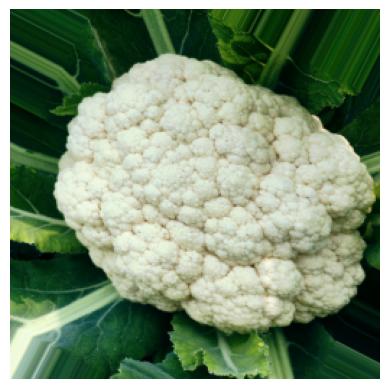

In [25]:
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy\\Disease Free. (96).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [26]:
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy\\Disease Free. (96).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.01176471 0.16862746 0.07843138]
  [0.01960784 0.19215687 0.07450981]
  [0.01960784 0.20784314 0.05882353]
  ...
  [0.11372549 0.32156864 0.07843138]
  [0.07843138 0.2784314  0.02352941]
  [0.06666667 0.26666668 0.00392157]]

 [[0.04705882 0.23529412 0.09019608]
  [0.00784314 0.16470589 0.07843138]
  [0.01176471 0.16862746 0.07843138]
  ...
  [0.11372549 0.30980393 0.04705882]
  [0.05882353 0.25882354 0.00784314]
  [0.08627451 0.29411766 0.01176471]]

 [[0.11372549 0.30588236 0.12941177]
  [0.11372549 0.3137255  0.13333334]
  [0.04313726 0.22745098 0.08627451]
  ...
  [0.07450981 0.27450982 0.01960784]
  [0.06666667 0.27450982 0.00392157]
  [0.10196079 0.32156864 0.02745098]]

 ...

 [[0.9411765  0.98039216 0.8745098 ]
  [0.88235295 0.93333334 0.7764706 ]
  [0.7294118  0.81960785 0.6901961 ]
  ...
  [0.03921569 0.21176471 0.12941177]
  [0.04313726 0.21960784 0.1254902 ]
  [0.04313726 0.22352941 0.12156863]]

 [[0.91764706 0.96862745 0.8352941 ]
  [0.8156863  0.88235295 0.7254902 ]


In [27]:
# Image Parameters
img_size = 224
batch_size = 32

In [28]:

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [29]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 27902 images belonging to 32 classes.


In [30]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 6958 images belonging to 32 classes.


In [10]:
# Load the pre-trained Xception model
pretrained_model = Xception(
  weights='imagenet',
  include_top=False,
  input_shape=(img_size, img_size, 3))

# Freeze the convolutional base
pretrained_model.trainable = False



83683744/83683744 [==============================] - 53s 1us/step


In [11]:
# Model Definition
model = models.Sequential()

# Add the pretrained Xception base
model.add(pretrained_model)

# Add layers on top of the pretrained base
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Model summary
model.summary()

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
Total params: 46560072 (177.61 MB)
Trainable params: 25698592 (98.03 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________



In [13]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/5


871/871 [==============================] - 2038s 2s/step - loss: 1.2787 - accuracy: 0.6867 - val_loss: 1.4468 - val_accuracy: 0.6538
Epoch 2/5
871/871 [==============================] - 1639s 2s/step - loss: 0.3706 - accuracy: 0.8796 - val_loss: 1.3855 - val_accuracy: 0.6979
Epoch 3/5
871/871 [==============================] - 1489s 2s/step - loss: 0.2678 - accuracy: 0.9124 - val_loss: 1.5882 - val_accuracy: 0.7000
Epoch 4/5
871/871 [==============================] - 1495s 2s/step - loss: 0.2185 - accuracy: 0.9295 - val_loss: 2.1845 - val_accuracy: 0.6806
Epoch 5/5
871/871 [==============================] - 1547s 2s/step - loss: 0.1818 - accuracy: 0.9416 - val_loss: 1.7943 - val_accuracy: 0.7211


In [14]:
model.save('S:\\PROJECT\\Code\\Xception_CPD_model.h5')

C:\Users\shamj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
217/217 [==============================] - 255s 1s/step - loss: 1.7947 - accuracy: 0.7215
Validation Accuracy: 72.15%


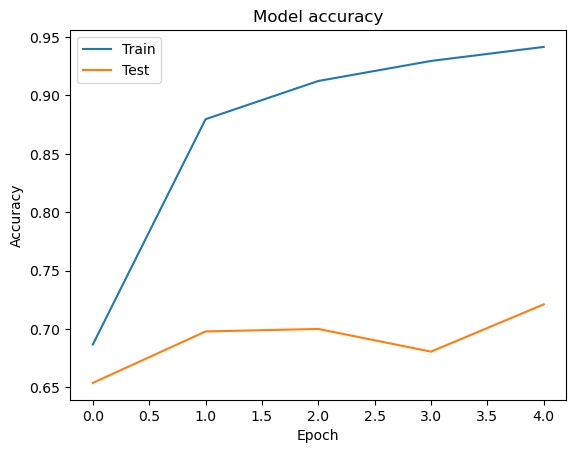

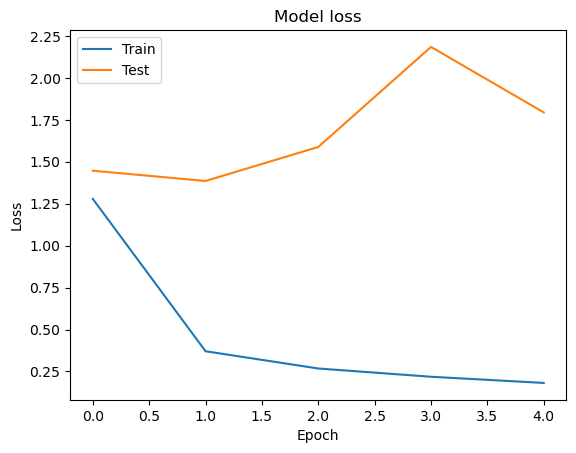

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [32]:
from tensorflow.keras.utils import to_categorical

class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Get the number of classes
num_classes = len(class_indices)

# Perform one-hot encoding for each class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in class_indices}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label}")


Class Index: 0, One-Hot Encoded Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 1, One-Hot Encoded Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 2, One-Hot Encoded Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 3, One-Hot Encoded Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 4, One-Hot Encoded Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 5, One-Hot Encoded Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 6, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 7, One-Hot Encoded La

In [33]:
class_indices

{0: 'Cauliflower___Bacterial_spot_rot',
 1: 'Cauliflower___Black_Rot',
 2: 'Cauliflower___Downy_Mildew',
 3: 'Cauliflower___Healthy',
 4: 'Corn___Blight',
 5: 'Corn___Common_Rust',
 6: 'Corn___Gray_Leaf_Spot',
 7: 'Corn___Healthy',
 8: 'Potato___Bacterial_Wilt',
 9: 'Potato___Blight',
 10: 'Potato___Healthy',
 11: 'Rice___Bacterial_Leaf_Blight',
 12: 'Rice___Brown_Spot',
 13: 'Rice___Healthy',
 14: 'Rice___Hispa',
 15: 'Rice___Leaf_Blast',
 16: 'Rice___Leaf_scald',
 17: 'Rice___Sheath_Blight',
 18: 'Tomato___Bacterial_spot',
 19: 'Tomato___Early_blight',
 20: 'Tomato___Healthy',
 21: 'Tomato___Late_blight',
 22: 'Tomato___Leaf_Mold',
 23: 'Tomato___Septoria_leaf_spot',
 24: 'Tomato___Spider_mites Two-spotted_spider_mite',
 25: 'Tomato___Target_Spot',
 26: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 27: 'Tomato___Tomato_mosaic_virus',
 28: 'Wheat___Healthy',
 29: 'Wheat___Mildew',
 30: 'Wheat___Rust',
 31: 'Wheat___Septorial'}

In [34]:
# saving the class names as json file
json.dump(class_indices, open('S:\\PROJECT\\Code\\Xception_CPD_class_indices.json', 'w'))

In [35]:
import csv

# Assuming you have a 'class_indices' dictionary

# Specify the file path for the CSV file
csv_file_path = 'S:\\PROJECT\\Code\\Xception_CPD_class_indices.csv'

# Save class indices as a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['ClassIndex', 'ClassName'])  # Write header

    for class_index, class_name in class_indices.items():
        csv_writer.writerow([class_index, class_name])


In [36]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('S:\\PROJECT\\Code\\Xception_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
# Example Usage
image_path = 'S://PROJECT//Datasets//NewCropsDataset//Cauliflower___Healthy//Disease Free. (40).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___healthy/image (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___Northern_Leaf_Blight/image (1).JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

NameError: name 'model' is not defined

In [17]:
# Example Usage
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Corn___Healthy\\ch2.jpeg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___healthy/image (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___Northern_Leaf_Blight/image (1).JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

NameError: name 'predict_image_class' is not defined

**Make** **Prediction**

In [7]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('S:\\PROJECT\\Code\\Xception_CPD_model.h5')



In [8]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('S:\\PROJECT\\Code\\Xception_CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

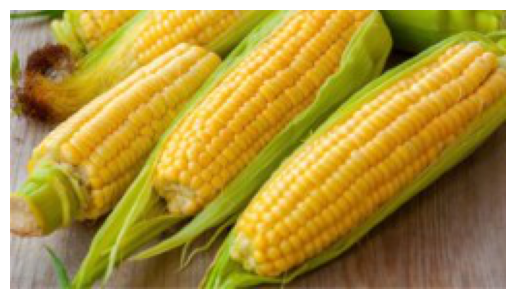

1/1 [==============================] - 2s 2s/step
Predicted Class Name: Corn___Healthy


In [5]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Corn___Healthy\\ch2.jpeg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

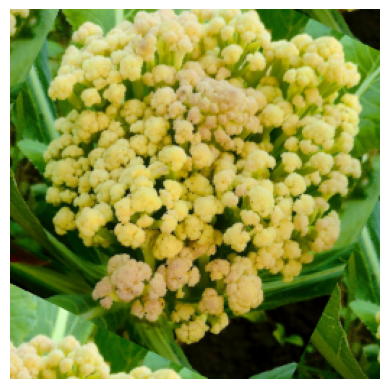

1/1 [==============================] - 0s 186ms/step
Predicted Class Name: Cauliflower___Bacterial_spot_rot


In [6]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Bacterial_spot_rot\\Bacterial spot (362).jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

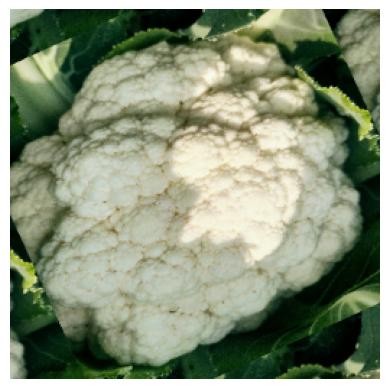

1/1 [==============================] - 1s 1s/step
Predicted Class Name: Cauliflower___Healthy


In [10]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = 'S:\\PROJECT\\Datasets\\NewCropsDataset\\Cauliflower___Healthy\\Disease Free. (40).jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

**Convert Model into Tflite**

In [ ]:
import json
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Code/CPD_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')


**Tflite Model Prediction**

In [ ]:

# Load class indices from the JSON file
with open('/content/drive/MyDrive/Project/Code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(interpreter, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    # Run inference
    interpreter.invoke()
    # Get the output
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name







In [ ]:
# Load TensorFlow Lite model and allocate tensors
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [ ]:
# Example Usage
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Wheat___Healthy/wh1_0_5897.jpg'
predicted_class_name = predict_image_class(interpreter, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)